# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from api_ipython import IPythonAPI as iapi
from parameter_definitions import *
from implementation import Implementation as imp
import sympy.physics.units as u

%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.SlowTrans, ImagingModes.CSS)
verbose_display = True

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Testing the new "parameter sweep" functionality. Not yet fully implemented.

Starting sweep of parameter Qfcv, evaluating expression Rflop over range (1, 10) in 9 steps (i.e. 10 data points)
done with parameter sweep!


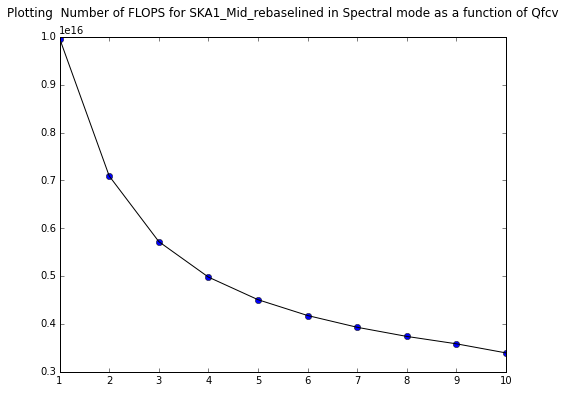

In [2]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Qfcv'
param_val_min = 1
param_val_max = 10
number_steps = 9
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.Spectral

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_exp_param_sweep_1d(telescope, immode, band=Bands.Mid1, 
                                                       expression='Rflop', parameter=parameter, param_val_min=param_val_min,
                                                       param_val_max=param_val_max, number_steps=number_steps, 
                                                       unit_string=None, verbose=False)
header = 'Plotting  Number of FLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, results)


## Using default values, we can compare telescopes side-by-side

Image Characteristics:
----------------------

Facet FOV:  0.167078875061737/N_facet  rads
PSF size:   5.71033253333333e-6  rads
Pixel size: 1.14206650666667e-6  rads
No. pixels on facet side: 146295.22369007/N_facet
----------------------

Channelization Characteristics:
-------------------------------

Ionospheric timescale:  10.0  sec
T_dump predict:  0.106666666666667*s  sec
T_dump backward:  Min(10.0*s, 0.106666666666667*N_facet*s)  sec

No. freq channels for predict:  1.09861228866811/log(1.0 + 5.12661986551859*m/Bmax,bin)
No. freq channels for backward step:  1.09861228866811/log(1.0 + 5.12661986551859*N_facet*m/Bmax,bin)

NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING

------------------------------

Geometry Assumptions:
-------------------------------

Delta W Earth:  3.43205973459624e-8*Bmax,bin**2/m**2  lambda
Delta W Snapshot:  6.38501782289667e-5*Bmax,bin*T_snap/m  lambda
Delta W max:  1.0*Max(3.43205973459624e-8*Bmax,bin**2/m**2, 6.38501782289667e-5*Bmax,bin*T_snap/m

Telescope,SKA1_Mid_rebaselined,SKA1_Mid_rebaselined,
Band,Mid1,Mid1,
Mode,Continuum,Spectral,
Baseline Dependent Time Avg.,False,False,
Max Baseline,150,150,km
Max # channels,65536,65536,
Optimal Number of Facets,6,3,
Optimal Snapshot Time,1e+03,752,sec.
Visibility Buffer,12.1,24.6,PetaBytes
Working (cache) memory,14.2,24.4,TeraBytes
Image side length,24382,27091,pixels


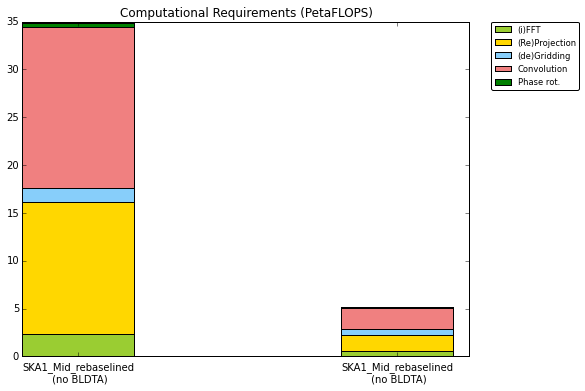

In [10]:
Tel1_BLDTA = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
Tel2_BLDTA = False
interact_manual(iapi.compare_telescopes_default, 
                Telescope_1=available_teles, Telescope_2=available_teles, Band_1=available_bands,
                Band_2=available_bands, Mode_1=available_modes, Mode_2=available_modes,
                Tel1_BLDTA=Tel1_BLDTA, Tel2_BLDTA=Tel2_BLDTA, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [6]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact(iapi.evaluate_telescope_manual, max_baseline=(10,200), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         Telescope=available_teles, Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, 
         verbose=verbose_display);

Max Baseline,77 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum
Tsnap,900.6 sec
Nfacet,5


Npix_linear, per facet 33438.9082720161/N_facet
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)
>>> Qfcv = 10
Rflop fft  111816058642430.0*f_bin*log(33438.9082720161/N_facet)/(T_snap*log(2))


Visibility Buffer,1.13 PetaBytes
Working (cache) memory,1.76 TeraBytes
Image side length,6687 pixels
I/O Rate,7.16 TeraBytes/s
Total Compute Requirement,4.87 PetaFLOPS
-> Gridding,0.263 PetaFLOPS
-> FFT,0.00158 PetaFLOPS
-> Projection,0.00993 PetaFLOPS
-> Convolution,4.56 PetaFLOPS
-> Phase Rotation,0.0271 PetaFLOPS


### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,68 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum


Npix_linear, per facet 33438.9082720161/N_facet
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)
>>> Qfcv = 10
Rflop fft  111816058642430.0*f_bin*log(33438.9082720161/N_facet)/(T_snap*log(2))
Evaluating Nfacets = 1
Tsnap has been optimized as : 27.508228. (Cost function = 1.126959)
Evaluating Nfacets = 2
Tsnap has been optimized as : 45.317811. (Cost function = 0.688352)
Evaluating Nfacets = 3
Tsnap has been optimized as : 59.941767. (Cost function = 0.813877)

Expression increasing with number of facets; aborting exploration of Nfacets > 3

0.688352 PetaFLOPS was the lowest FLOP value, found for (Nfacet, Tsnap) = (2, 45.32)


Optimal Number of Facets,2
Optimal Snapshot Time,45.3 sec.
Visibility Buffer,1.13 PetaBytes
Working (cache) memory,0.128 TeraBytes
Image side length,16719 pixels
I/O Rate,1.15 TeraBytes/s
Total Compute Requirement,0.688 PetaFLOPS
-> Gridding,0.127 PetaFLOPS
-> FFT,0.0346 PetaFLOPS
-> Projection,0.197 PetaFLOPS
-> Convolution,0.325 PetaFLOPS


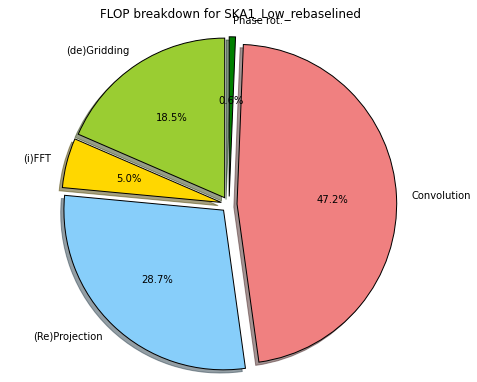

In [7]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10,200), Nf_max = (1,256000,1), Telescope=available_teles, 
         Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, verbose=verbose_display);